/var/folders/zr/dvb9txgj40b71t1ywfg0xl3m0000gn/T/ipykernel_79244/3013642524.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


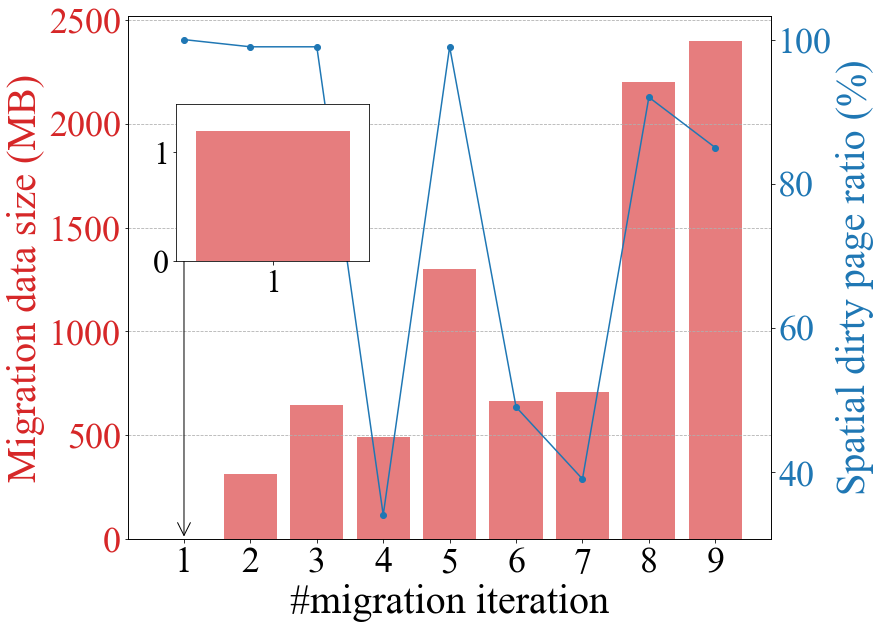

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Font and style settings
plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

label_size = 40
tick_size = 36
linewidth = 2.5
legend_size = 28
mark_size = 10
bwith = 2

# Function to convert sizes, unchanged
def convert_size(size_str):
    """Converts a size string like '312M' to bytes."""
    size_str = size_str.strip().upper()
    multipliers = {'M': 1e6, 'G': 1e9}
    if size_str.endswith('M') or size_str.endswith('G'):
        return float(size_str[:-1]) * multipliers[size_str[-1]]
    elif size_str.endswith('K'):
        return float(size_str[:-1]) * 1e3
    else:  # Assuming raw byte value
        return float(size_str)

def convert_size(size_str):
    """Converts a size string like '312M' or '1.5G' to megabytes (MB)."""
    size_str = size_str.strip().upper()
    multipliers = {'M': 1, 'G': 1e3, 'K': 1e-3}
    
    if size_str.endswith(('M', 'G', 'K')):
        return float(size_str[:-1]) * multipliers[size_str[-1]]
    else:  # Assuming raw byte value, convert bytes to MB
        return float(size_str) / 1e6

# Sample data for CHK_SIZE
dirty_rate = [1.0, 0.99, 0.99, 0.34, 0.99, 0.49, 0.39, 0.92, 0.85]
CHK_SIZE = ["1.2M", "312M", "644M", "490M", "1.3G", "663M", "706M", "2.2G", "2.4G"]
chk_size_bytes = [convert_size(size) for size in CHK_SIZE]

# Create figure with single subplot
fig, ax1 = plt.subplots(figsize=(13, 9.5))  # Adjusted size for one subplot

# Bar chart for data size
color = 'tab:red'
ax1.set_xlabel('#migration iteration', fontsize=label_size)
ax1.set_ylabel('Migration data size (MB)', color=color, fontsize=label_size)
ax1.bar(range(len(chk_size_bytes)), chk_size_bytes, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color, labelsize=tick_size)
ax1.set_xticks(range(len(CHK_SIZE)))
ax1.set_xticklabels(range(1, len(CHK_SIZE) + 1), fontsize=tick_size)
ax1.grid(axis='y', linestyle='--')
# Line plot for dirty rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Spatial dirty page ratio (%)', color=color, fontsize=label_size)
ax2.plot(range(len(dirty_rate)), [rate * 100 for rate in dirty_rate], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color, labelsize=tick_size)

# Magnifying glass effect
axins = inset_axes(ax1, width="30%", height="30%", loc='lower left',
                   bbox_to_anchor=(0.05, 0.5, 1, 1),
                   bbox_transform=ax1.transAxes)
axins.bar(range(len(chk_size_bytes)), chk_size_bytes, color='tab:red', alpha=0.6)
axins.set_xlim(-0.5, 0.5)  # Focusing on the first bar
axins.set_ylim(0, max(chk_size_bytes[0:1]) * 1.2)
axins.set_xticks([0])
axins.set_xticklabels(['1'])

# Rectangle and annotation to emphasize the magnifying glass effect
# rect = Rectangle((-0.4, 1), 0.8, chk_size_bytes[0], linewidth=2, edgecolor='b', facecolor='none')
# axins.add_patch(rect)
ax1.annotate('', xy=(0, chk_size_bytes[0]), xytext=(0, chk_size_bytes[0]*1500),
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"))

# Adjust layout and display the chart
fig.tight_layout()
fig.savefig(os.path.join(".", "mem-live-migrate.pdf"), format='pdf', bbox_inches='tight')
plt.show()


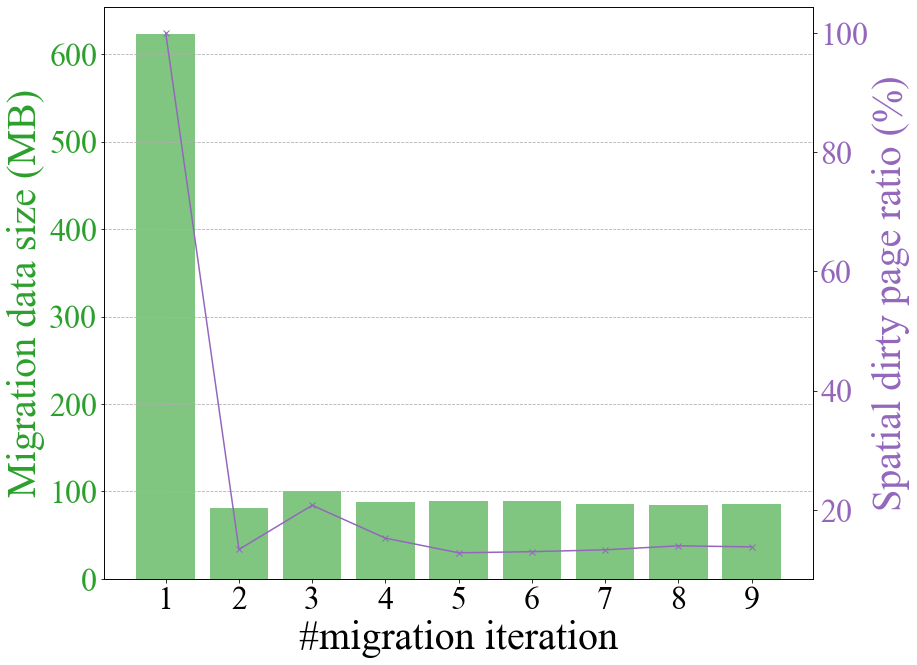

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Font and style settings
plt.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

label_size = 40
tick_size = 32
linewidth = 2.5
legend_size = 28
mark_size = 10
bwith = 2

# Function to convert size strings to bytes
# def convert_size(size_str):
#     """Converts a size string like '312M' to bytes."""
#     size_str = size_str.strip().upper()
#     multipliers = {'M': 1e6, 'G': 1e9}
#     if size_str.endswith('M') or size_str.endswith('G'):
#         return float(size_str[:-1]) * multipliers[size_str[-1]]
#     elif size_str.endswith('K'):
#         return float(size_str[:-1]) * 1e3
#     else:
#         return float(size_str)

# Data setup for CHK_SIZE2
dirty_rate2 = [1.0, 0.1337, 0.2077, 0.1526, 0.128, 0.1299, 0.133, 0.1397, 0.138]
CHK_SIZE2 = ["623M", "81M", "100M", "88M", "89M", "89M", "85M", "84M", "85M"]
chk_size_bytes2 = [convert_size(size) for size in CHK_SIZE2]

# Create figure for CHK_SIZE2 subplot
fig, ax1 = plt.subplots(figsize=(13.5, 10))  # Adjust size as needed

# Bar chart for CHK_SIZE2 data size
color = 'tab:green'
ax1.set_xlabel('#migration iteration', fontsize=label_size)
ax1.set_ylabel('Migration data size (MB)', color=color, fontsize=label_size)
ax1.bar(range(len(chk_size_bytes2)), chk_size_bytes2, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color, labelsize=tick_size)
ax1.set_xticks(range(len(CHK_SIZE2)))
ax1.set_xticklabels(range(1, len(CHK_SIZE2) + 1), fontsize=tick_size)
ax1.grid(axis='y', linestyle='--')
# Line plot for dirty rate on secondary y-axis
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Spatial dirty page ratio (%)', color=color, fontsize=label_size)
ax2.plot(range(len(dirty_rate2)), [rate * 100 for rate in dirty_rate2], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color, labelsize=tick_size)


# Adjust layout and display the chart
fig.tight_layout()
fig.savefig(os.path.join(".", "resnet50-live-migrate.pdf"), format='pdf', bbox_inches='tight')
plt.show()
